***IMPORT*** ***LIBRARIES***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

***IMAGE AUGMENTATION***

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
data_path = '/content/drive/MyDrive/Flowers-Dataset/flowers/'
batch_size = 32
target_size = (64, 64)

Mounted at /content/drive/


In [3]:
train_datagenerated = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagenerated = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [4]:
X_train = train_datagenerated.flow_from_directory(data_path,target_size=target_size,batch_size=batch_size,subset="training",class_mode='categorical')
X_test = test_datagenerated.flow_from_directory(data_path,target_size=target_size,batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical')

Found 1891 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


***MODEL CREATION***

In [5]:
model = Sequential()

 ***ADD LAYERS: CONVOLUTION,MAXPOOLING,FLATTEN,DENSE-(HIDDEN LAYERS),OUTPUT***

In [6]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

***COMPILE THE MODEL***

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

***FIT THE MODEL***

In [8]:
model.fit(X_train, steps_per_epoch=100, epochs=15)

Epoch 1/15
 60/100 [=================>............] - ETA: 3:31 - loss: 0.9837 - accuracy: 0.4870

100/100 [==============================] - 318s 3s/step - loss: 0.9837 - accuracy: 0.4870


***SAVE THE MODEL***

In [9]:
model.save("model.h5")

***TEST THE MODEL***

In [10]:
def predict():
    img = image.load_img("/content/drive/MyDrive/Flowers-Dataset/flowers/tulip/251811158_75fa3034ff.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print('The given image is a {prediction}')
    plt.imshow(plt.imread("/content/drive/MyDrive/Flowers-Dataset/flowers/tulip/251811158_75fa3034ff.jpg"))
    plt.axis('off')
    plt.show()

The given image is a {prediction}


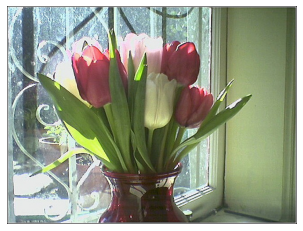

In [11]:
predict()